In [1]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns

# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [2]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.3846153846

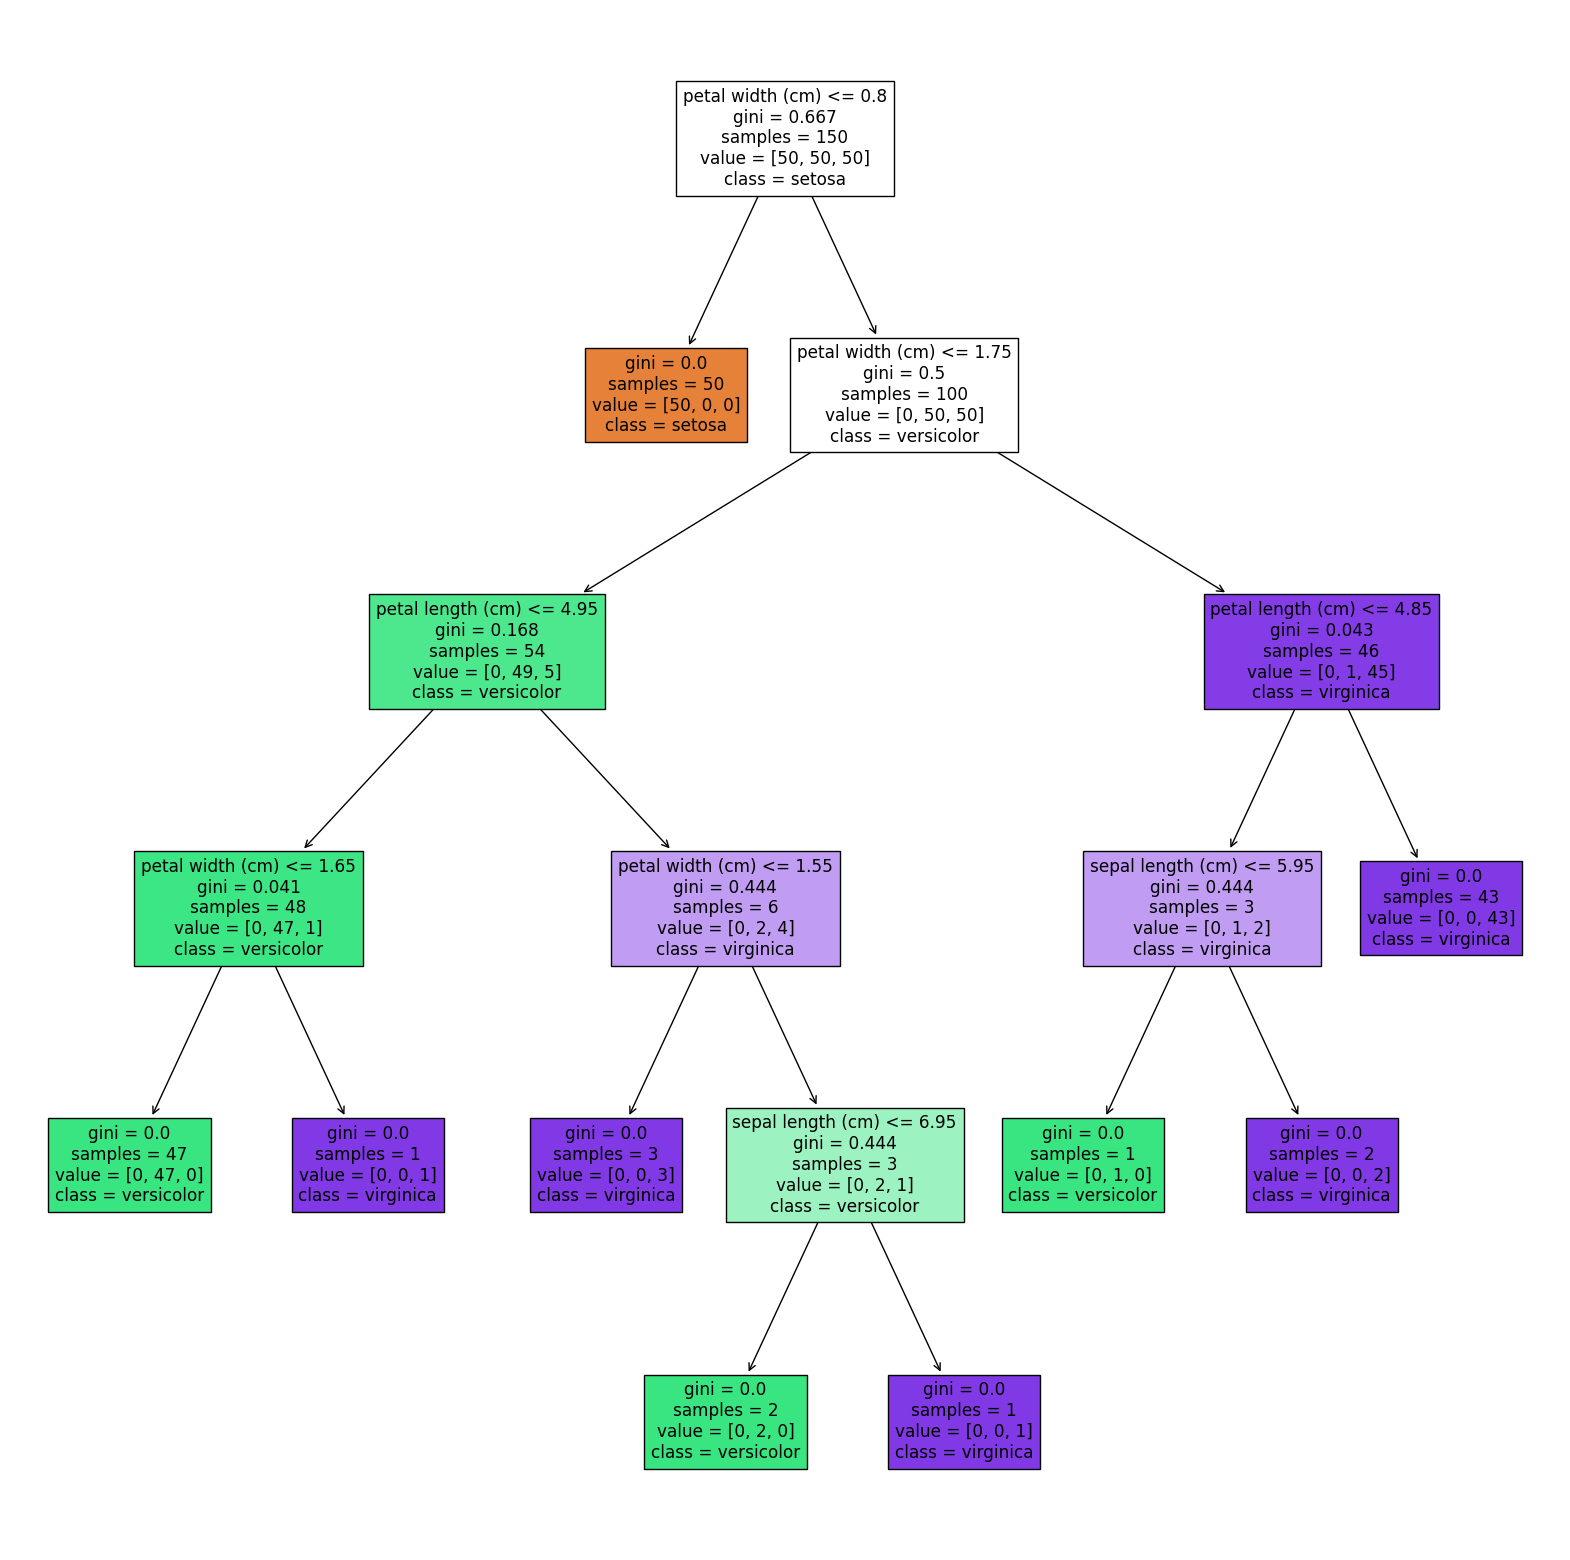

In [3]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
class_names = iris.target_names[dtree.classes_].tolist()
tree.plot_tree(dtree, feature_names=iris.feature_names, class_names=class_names, filled=True)


# Another Way 

In [4]:
iris=sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# forming dependent and indepentent variable 
X=iris.drop(columns='species')
y=iris['species']

In [6]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=1)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(Xtrain,ytrain)


DecisionTreeClassifier()

In [10]:
# Predict the labels for the test set
y_pred = dtree.predict(Xtest)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score,cohen_kappa_score
# Calculate metrics
accuracy = accuracy_score(ytest, y_pred)
confusion = confusion_matrix(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
kappa = cohen_kappa_score(ytest, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{confusion}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Cohen's Kappa: {kappa}")

Accuracy: 0.9736842105263158
Confusion Matrix: 
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Precision: 0.9763157894736842
Recall: 0.9736842105263158
F1 Score: 0.9739522830846216
Cohen's Kappa: 0.9597883597883597


### Confusion Matrix explaination

* The first row is for predictions of the first class:
* 13 were correctly predicted as the first class (True Positives).
* 0 were wrongly predicted as the second class.
* 0 were wrongly predicted as the third class.

* The second row is for predictions of the second class:
* 0 were wrongly predicted as the first class.
* 15 were correctly predicted as the second class (True Positives).
* 1 was wrongly predicted as the third class.

* The third row is for predictions of the third class:
* 0 were wrongly predicted as the first class.
* 0 were wrongly predicted as the second class.
* 9 were correctly predicted as the third class (True Positives).

* Above we have good metrices score like accuracy_score, confusion_matrix, precision_score, recall_score,f1_score and Cohen_kappa_score